In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [38]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [39]:
try:
    project_root = Path.cwd().parent
    data_file_path = project_root / "data" / "raw" / "default_of_credit_card_clients.xls"
    
    if data_file_path.exists():
        print(f"Archivo encontrado en: {data_file_path}")
        # Se lee el archivo Excel, omitiendo la primera fila que no contiene datos.
        df_original = pd.read_excel(data_file_path, skiprows=1)
    else:
        print(f"Error: No se encontró el archivo en la ruta esperada: {data_file_path}")
        df_original = None

except Exception as e:
    print(f"Ocurrió un error al cargar el archivo: {e}")
    df_original = None

Archivo encontrado en: /Users/edusant/Desktop/personal/blue_tab/proyecto-riesgo-crediticio/data/raw/default_of_credit_card_clients.xls


In [40]:
if df_original is not None:
    print("\n--- Vista Previa de los Datos Originales ---")
    display(df_original.head())
    
    print("\n--- Información General del DataFrame ---")
    df_original.info()
else:
    print("\nNo se pudo cargar el DataFrame. El análisis no puede continuar.")



--- Vista Previa de los Datos Originales ---


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0



--- Información General del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2         

In [41]:
df = df_original.copy()

In [42]:
df.rename(columns={
    'LIMIT_BAL': 'limit_bal', 'SEX': 'sex', 'EDUCATION': 'education', 'MARRIAGE': 'marriage', 'AGE': 'age',
    'PAY_0': 'pay_sept', 'PAY_2': 'pay_aug', 'PAY_3': 'pay_july', 'PAY_4': 'pay_june', 'PAY_5': 'pay_may', 'PAY_6': 'pay_april',
    'BILL_AMT1': 'bill_amt_sept', 'BILL_AMT2': 'bill_amt_aug', 'BILL_AMT3': 'bill_amt_july', 'BILL_AMT4': 'bill_amt_june', 'BILL_AMT5': 'bill_amt_may', 'BILL_AMT6': 'bill_amt_april',
    'PAY_AMT1': 'pay_amt_sept', 'PAY_AMT2': 'pay_amt_aug', 'PAY_AMT3': 'pay_amt_july', 'PAY_AMT4': 'pay_amt_june', 'PAY_AMT5': 'pay_amt_may', 'PAY_AMT6': 'pay_amt_april',
    'default payment next month': 'default_payment_next_month'
}, inplace=True)

In [44]:
# 'education': Se agrupan valores no documentados (0, 5, 6) en la categoría 'Otros' (4).
df['education'] = df['education'].replace([0, 5, 6], 4)
# 'marriage': Se agrupa el valor no documentado (0) en 'Otros' (3).
df['marriage'] = df['marriage'].replace(0, 3)

In [45]:
print("Education:", sorted(df['education'].unique()))
print("Marriage:", sorted(df['marriage'].unique()))

Education: [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
Marriage: [np.int64(1), np.int64(2), np.int64(3)]


In [46]:
display(df.describe())

,ID,limit_bal,sex,education,marriage,age,pay_sept,pay_aug,pay_july,pay_june,...,bill_amt_june,bill_amt_may,bill_amt_april,pay_amt_sept,pay_amt_aug,pay_amt_july,pay_amt_june,pay_amt_may,pay_amt_april,default_payment_next_month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.842267,1.557267,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.744494,0.521405,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [47]:
default_counts = df['default_payment_next_month'].value_counts()
print(default_counts)

default_payment_next_month
0    23364
1     6636
Name: count, dtype: int64


/var/folders/4d/tzjl62s93dnc6338903pslc00000gn/T/ipykernel_22088/2514730707.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='default_payment_next_month', data=df, palette='viridis')


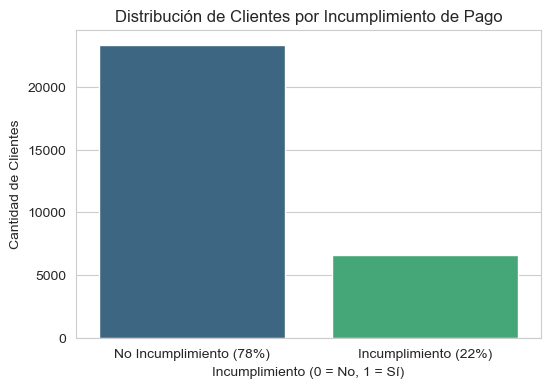

In [48]:
plt.figure(figsize=(6, 4))
sns.countplot(x='default_payment_next_month', data=df, palette='viridis')
plt.title('Distribución de Clientes por Incumplimiento de Pago')
plt.xlabel('Incumplimiento (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de Clientes')
plt.xticks([0, 1], ['No Incumplimiento (78%)', 'Incumplimiento (22%)'])
plt.show()


In [49]:
df['sex_label'] = df['sex'].map({1: 'Hombre', 2: 'Mujer'})
df['education_label'] = df['education'].map({1: 'Posgrado', 2: 'Universidad', 3: 'Secundaria', 4: 'Otros'})
df['marriage_label'] = df['marriage'].map({1: 'Casado/a', 2: 'Soltero/a', 3: 'Otros'})

/var/folders/4d/tzjl62s93dnc6338903pslc00000gn/T/ipykernel_22088/4292415449.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex_label', data=df, ax=axes[0], palette='pastel')
/var/folders/4d/tzjl62s93dnc6338903pslc00000gn/T/ipykernel_22088/4292415449.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='education_label', data=df, ax=axes[1], palette='pastel', order=df['education_label'].value_counts().index)
/var/folders/4d/tzjl62s93dnc6338903pslc00000gn/T/ipykernel_22088/4292415449.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.cou

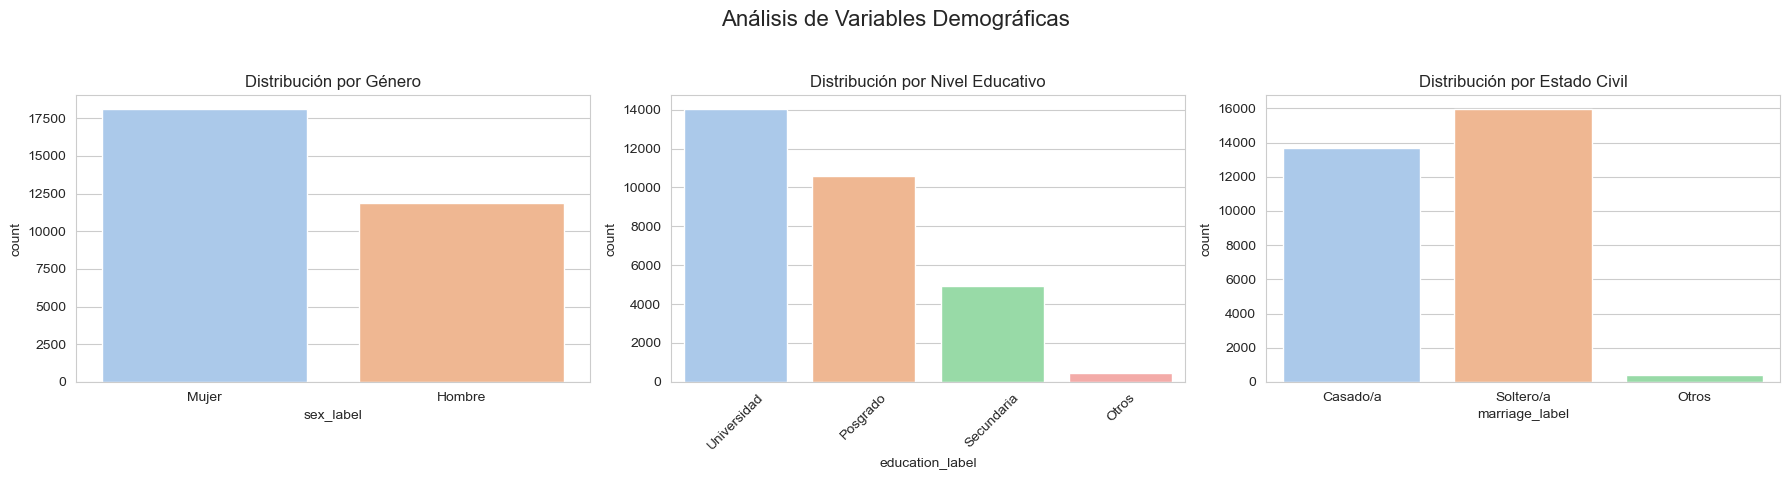

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(x='sex_label', data=df, ax=axes[0], palette='pastel')
axes[0].set_title('Distribución por Género')
sns.countplot(x='education_label', data=df, ax=axes[1], palette='pastel', order=df['education_label'].value_counts().index)
axes[1].set_title('Distribución por Nivel Educativo')
axes[1].tick_params(axis='x', rotation=45)
sns.countplot(x='marriage_label', data=df, ax=axes[2], palette='pastel')
axes[2].set_title('Distribución por Estado Civil')
plt.suptitle('Análisis de Variables Demográficas', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

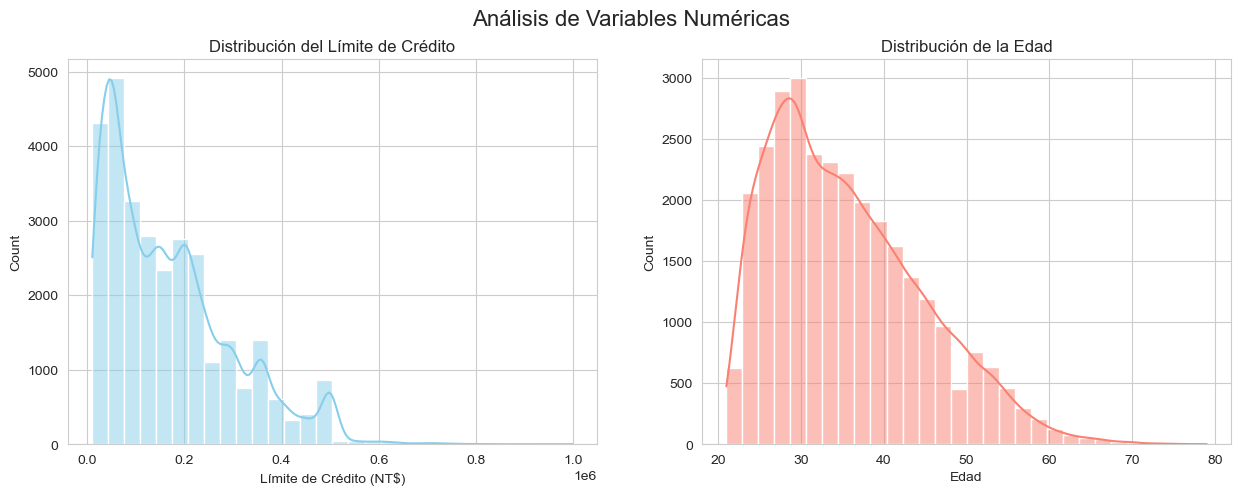

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df['limit_bal'], kde=True, ax=axes[0], bins=30, color='skyblue')
axes[0].set_title('Distribución del Límite de Crédito')
axes[0].set_xlabel('Límite de Crédito (NT$)')
sns.histplot(df['age'], kde=True, ax=axes[1], bins=30, color='salmon')
axes[1].set_title('Distribución de la Edad')
axes[1].set_xlabel('Edad')
plt.suptitle('Análisis de Variables Numéricas', fontsize=16)
plt.show()

/var/folders/4d/tzjl62s93dnc6338903pslc00000gn/T/ipykernel_22088/640025125.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='pay_sept_label', data=df, order=df['pay_sept_label'].value_counts().index, palette='plasma')


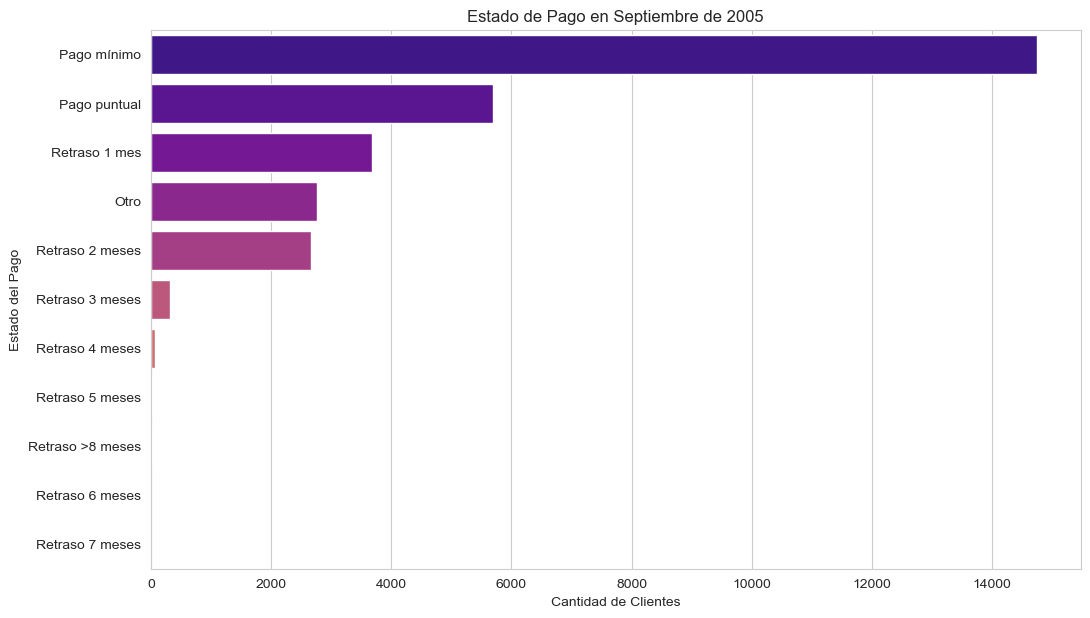

In [52]:
df['pay_sept_label'] = df['pay_sept'].map({
    -1: 'Pago puntual', 0: 'Pago mínimo', 1: 'Retraso 1 mes',
    2: 'Retraso 2 meses', 3: 'Retraso 3 meses', 4: 'Retraso 4 meses',
    5: 'Retraso 5 meses', 6: 'Retraso 6 meses', 7: 'Retraso 7 meses',
    8: 'Retraso >8 meses'
}).fillna('Otro')

plt.figure(figsize=(12, 7))
sns.countplot(y='pay_sept_label', data=df, order=df['pay_sept_label'].value_counts().index, palette='plasma')
plt.title('Estado de Pago en Septiembre de 2005')
plt.xlabel('Cantidad de Clientes')
plt.ylabel('Estado del Pago')
plt.show()

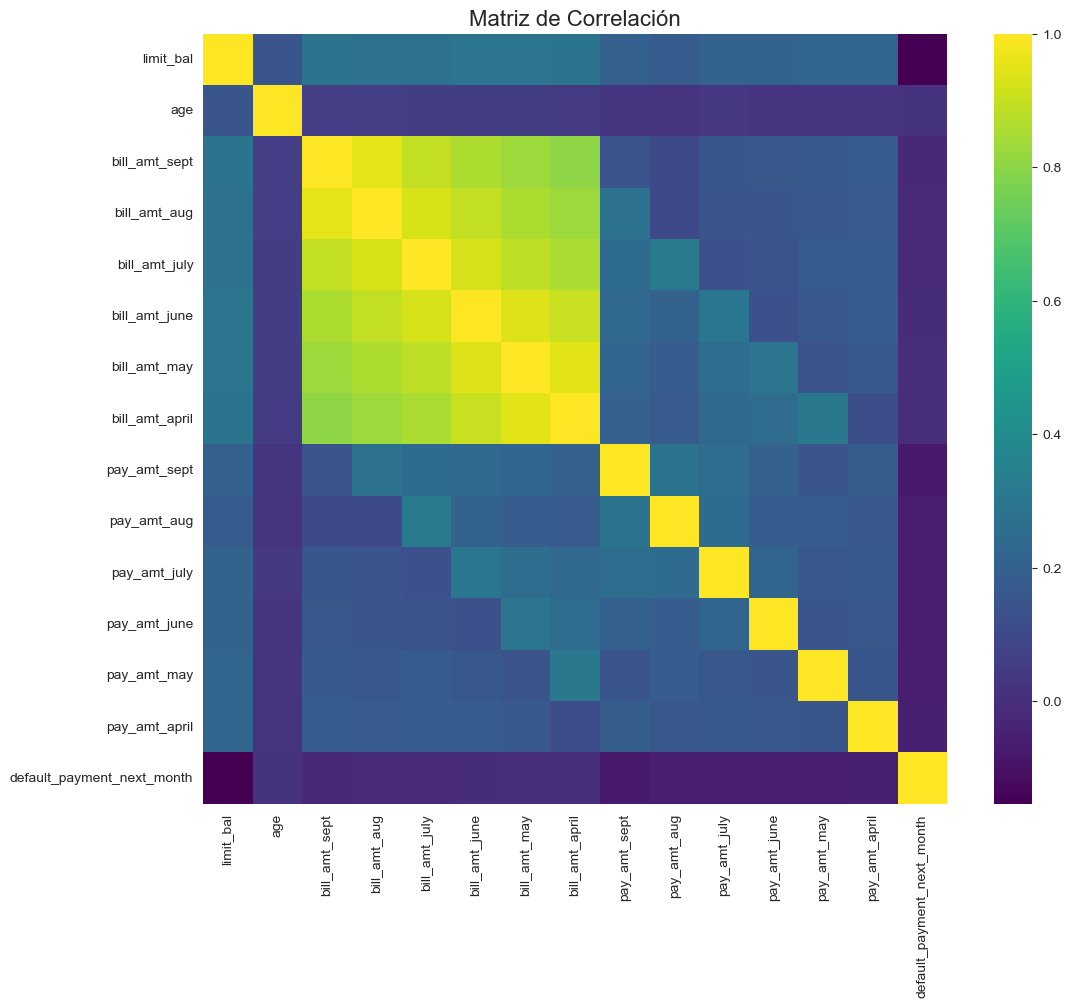

In [53]:
corr_cols = ['limit_bal', 'age'] + [c for c in df.columns if 'bill_amt' in c] + [c for c in df.columns if 'pay_amt' in c] + ['default_payment_next_month']
correlation_matrix = df[corr_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='viridis', annot=False)
plt.title('Matriz de Correlación', fontsize=16)
plt.show()

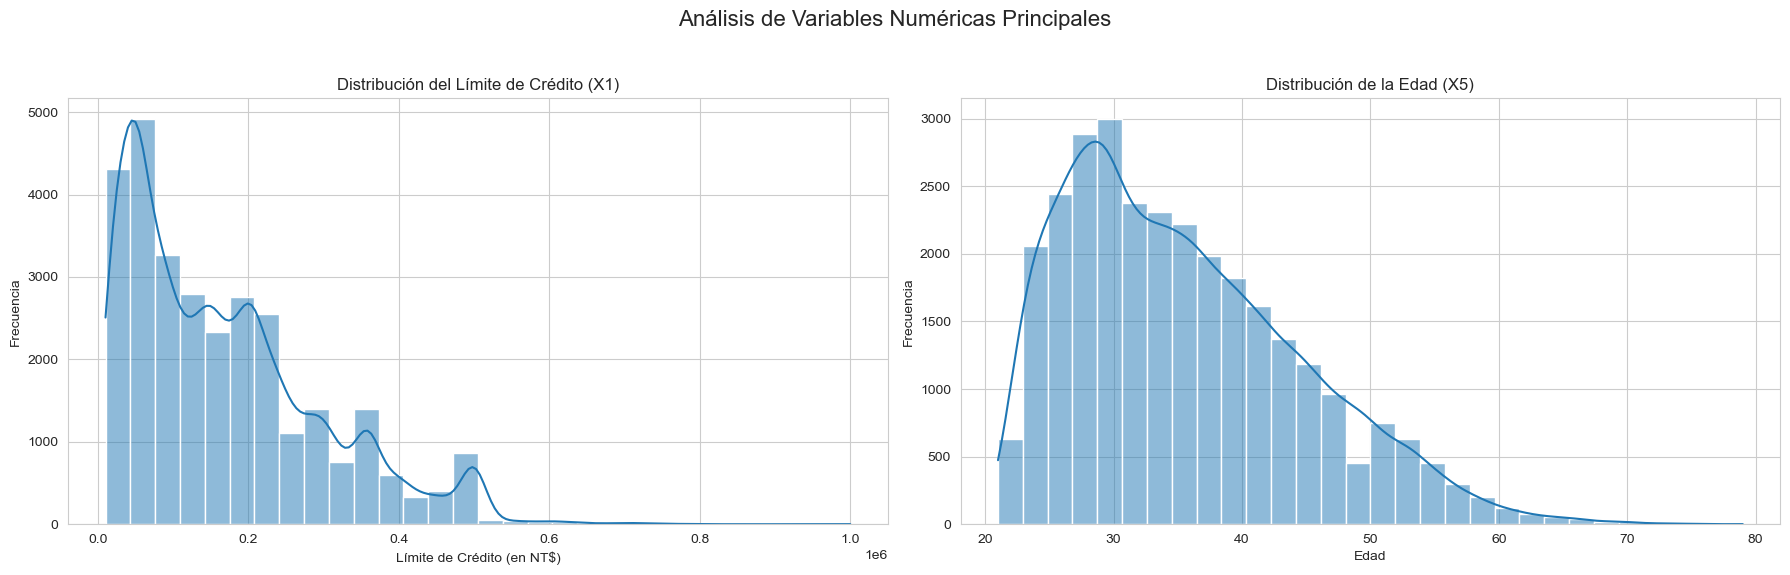

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.histplot(df['limit_bal'], kde=True, ax=axes[0], bins=30)
axes[0].set_title('Distribución del Límite de Crédito (X1)')
axes[0].set_xlabel('Límite de Crédito (en NT$)')
axes[0].set_ylabel('Frecuencia')

sns.histplot(df['age'], kde=True, ax=axes[1], bins=30)
axes[1].set_title('Distribución de la Edad (X5)')
axes[1].set_xlabel('Edad')
axes[1].set_ylabel('Frecuencia')

plt.suptitle('Análisis de Variables Numéricas Principales', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


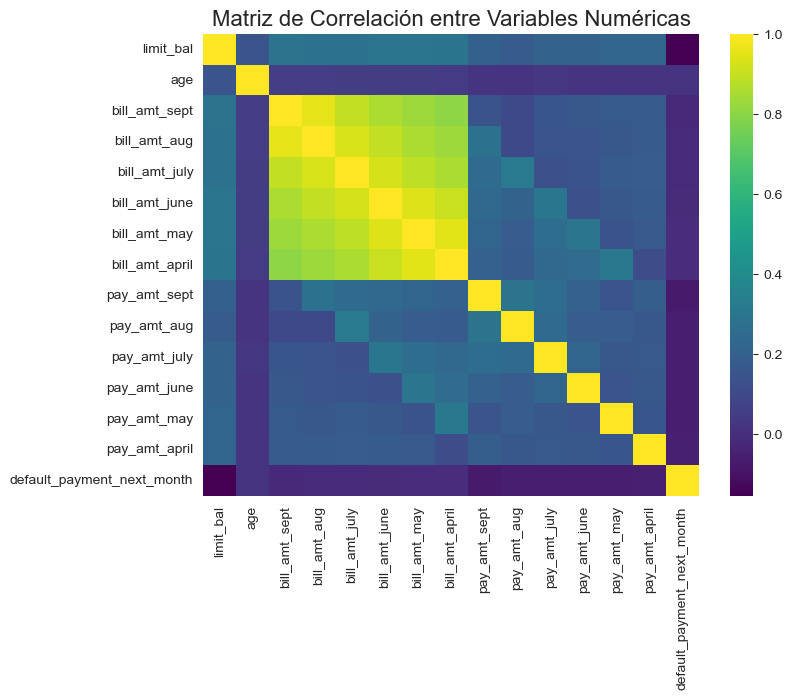

In [32]:
corr_cols = [
    'limit_bal', 'age', 
    'bill_amt_sept', 'bill_amt_aug', 'bill_amt_july', 'bill_amt_june', 'bill_amt_may', 'bill_amt_april',
    'pay_amt_sept', 'pay_amt_aug', 'pay_amt_july', 'pay_amt_june', 'pay_amt_may', 'pay_amt_april',
    'default_payment_next_month'
]
correlation_matrix = df[corr_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='viridis', annot=False)
plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=16)
plt.show()

In [22]:
df.columns

Index(['ID', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_sept',
       'pay_aug', 'pay_july', 'pay_june', 'pay_may', 'pay_april',
       'bill_amt_sept', 'bill_amt_aug', 'bill_amt_july', 'bill_amt_june',
       'bill_amt_may', 'bill_amt_april', 'pay_amt_sept', 'pay_amt_aug',
       'pay_amt_july', 'pay_amt_june', 'pay_amt_may', 'pay_amt_april',
       'default_payment_next_month', 'sex_label', 'education_label',
       'marriage_label', 'pay_sept_label'],
      dtype='object')

Nulos por columna categórica:
sex_label          0
education_label    0
marriage_label     0
dtype: int64 

Valores únicos por categoría:
sex_label: ['Mujer' 'Hombre']
education_label: ['Universidad' 'Posgrado' 'Secundaria' 'No Documentado' 'Otros']
marriage_label: ['Casado/a' 'Soltero/a' 'Otros' 'No Documentado']


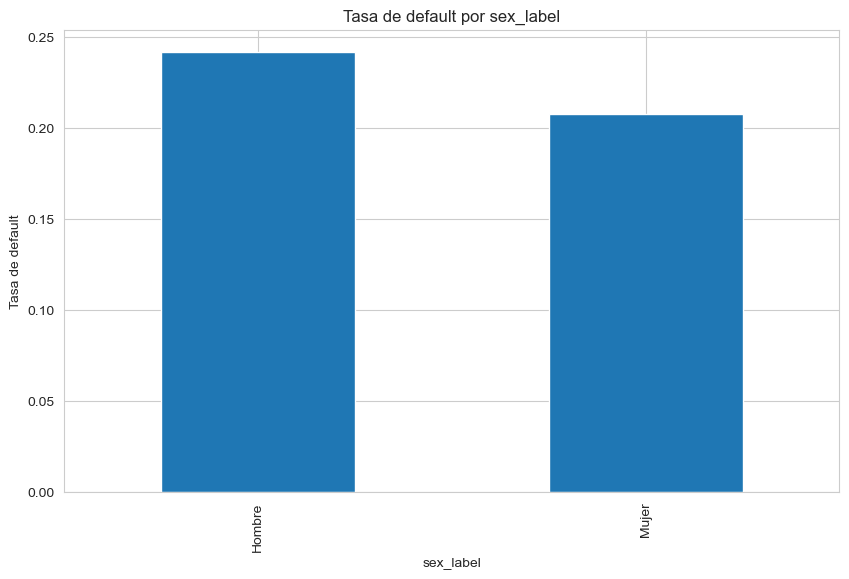

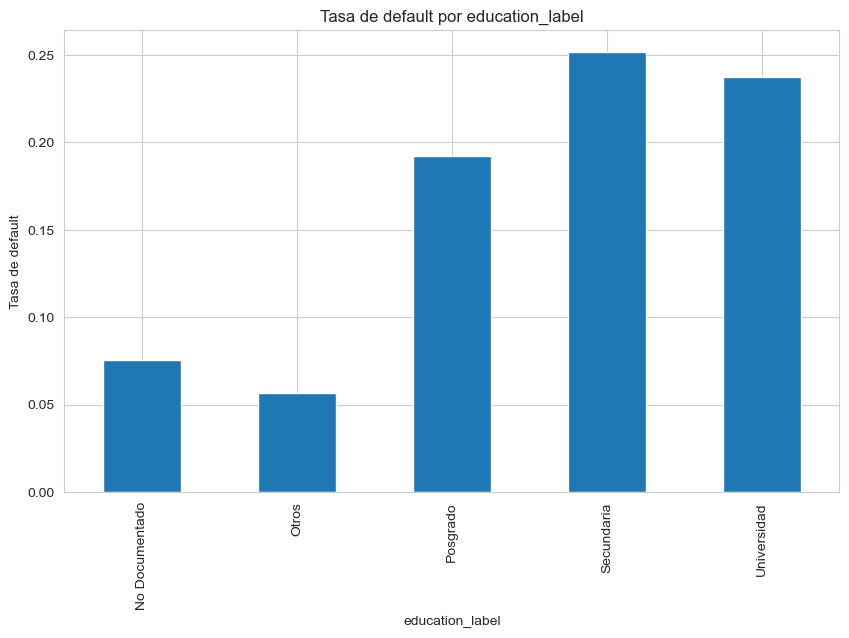

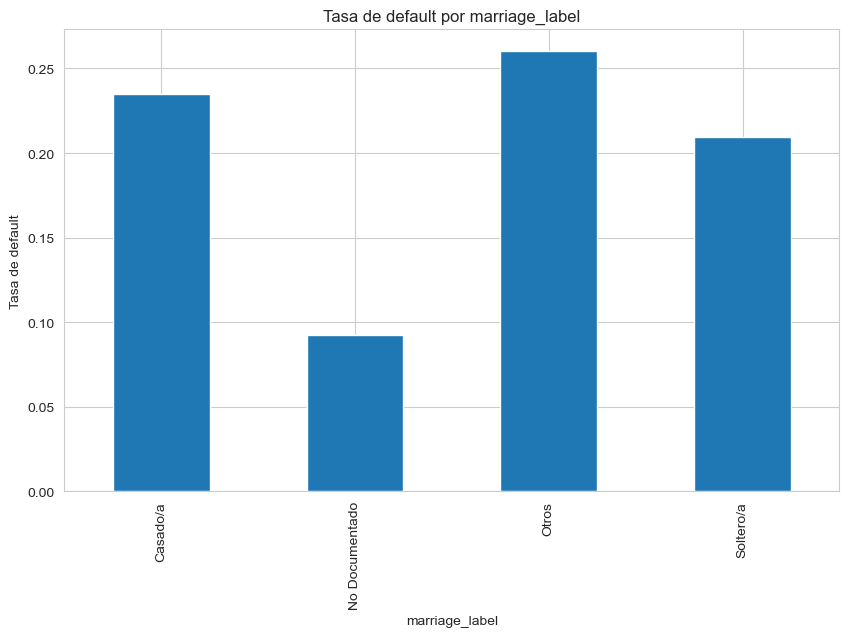

In [33]:
cat_cols = ['sex_label', 'education_label', 'marriage_label']

# Confirmación de nulos y valores únicos
print("Nulos por columna categórica:")
print(df[cat_cols].isnull().sum(), "\n")
print("Valores únicos por categoría:")
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")

# Tasa de default por categoría
for col in cat_cols:
    tasa = df.groupby(col)['default_payment_next_month'].mean()
    tasa.plot(kind='bar', title=f'Tasa de default por {col}')
    plt.xlabel(col); plt.ylabel('Tasa de default')
    plt.show()

,0.00,0.01,0.25,0.50,0.75,0.99,1.00
limit_bal,10000.0,10000.00,50000.00,140000.0,240000.00,500000.00,1000000.0
bill_amt_sept,-165580.0,-81.00,3558.75,22381.5,67091.00,350110.68,964511.0
bill_amt_aug,-69777.0,-200.00,2984.75,21200.0,64006.25,337495.28,983931.0
bill_amt_july,-157264.0,-200.00,2666.25,20088.5,60164.75,325030.39,1664089.0
bill_amt_june,-170000.0,-212.02,2326.75,19052.0,54506.00,304997.27,891586.0
bill_amt_may,-81334.0,-232.01,1763.00,18104.5,50190.50,285868.33,927171.0
bill_amt_april,-339603.0,-331.03,1256.00,17071.0,49198.25,279505.06,961664.0
pay_amt_sept,0.0,0.00,1000.00,2100.0,5006.00,66522.18,873552.0
pay_amt_aug,0.0,0.00,833.00,2009.0,5000.00,76651.02,1684259.0
pay_amt_july,0.0,0.00,390.00,1800.0,4505.00,70000.00,896040.0


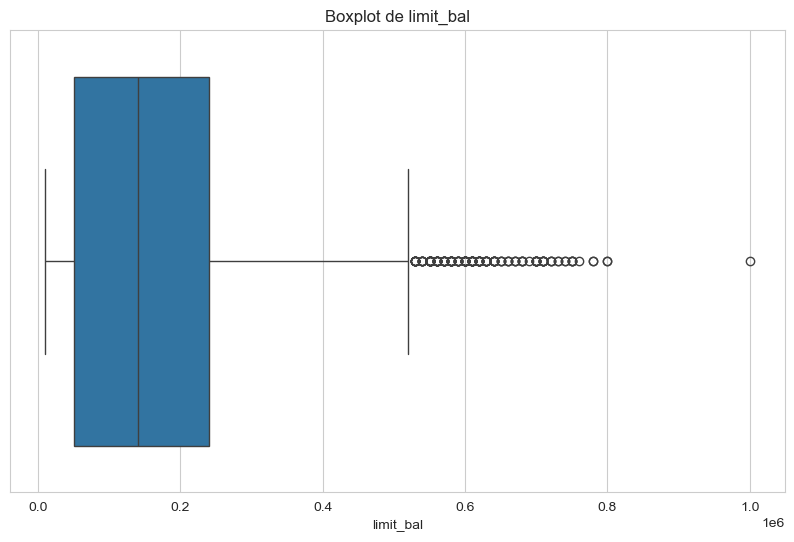

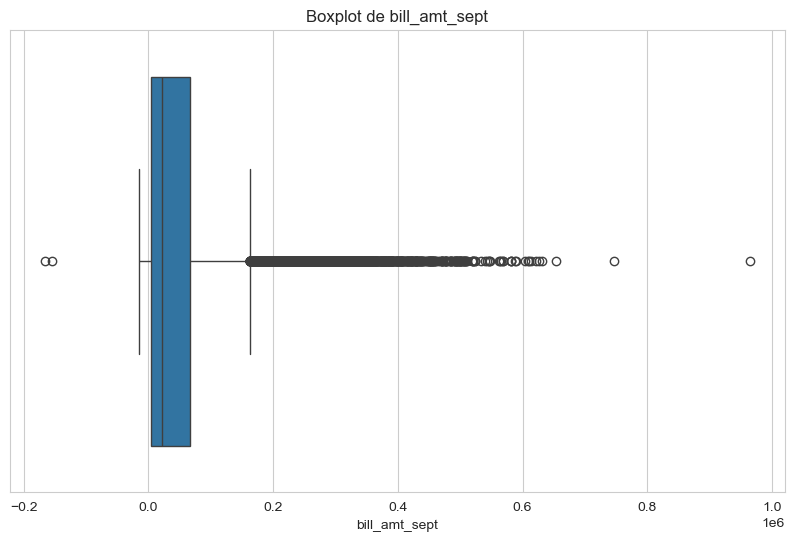

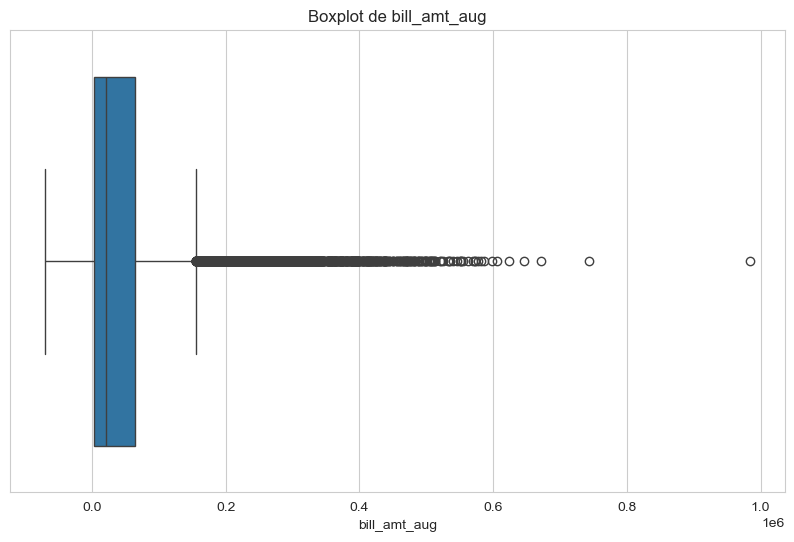

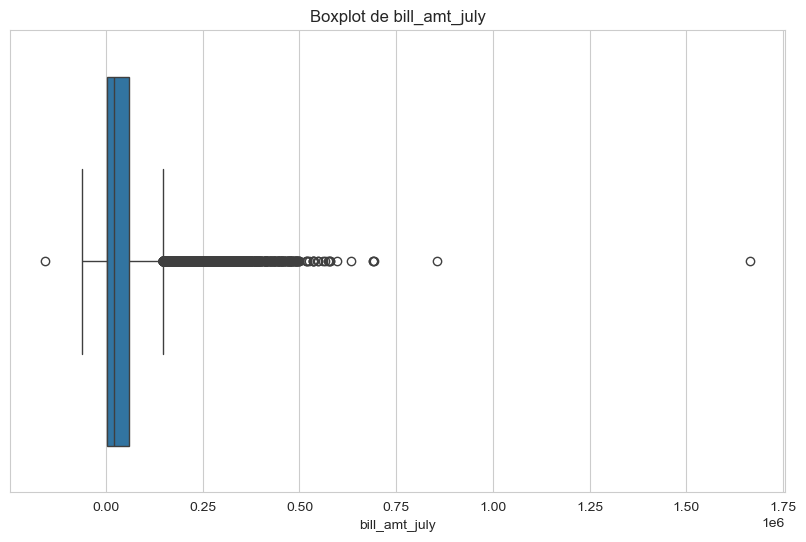

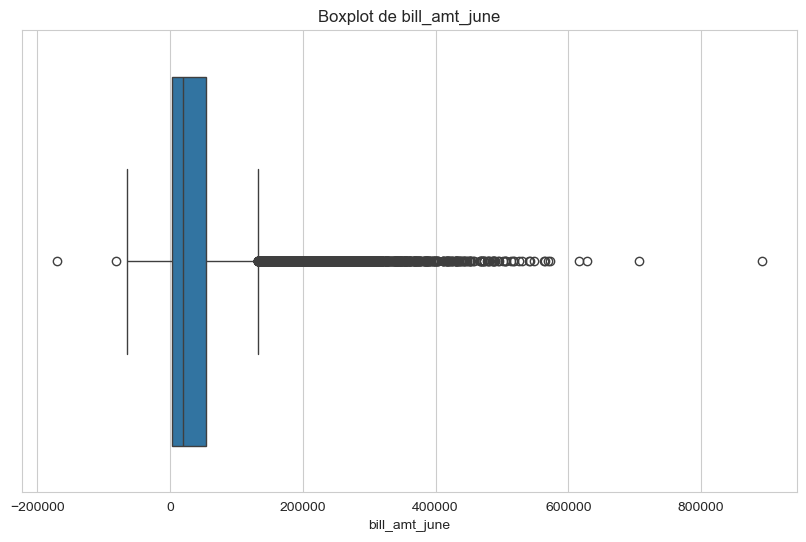

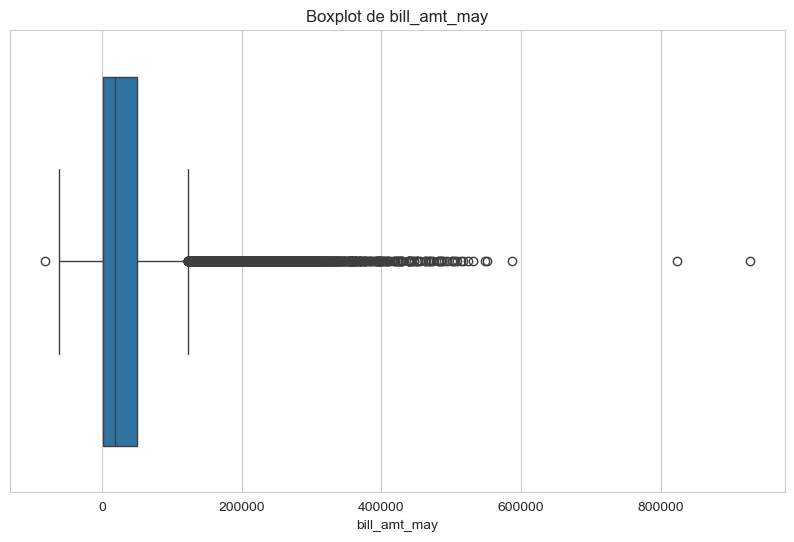

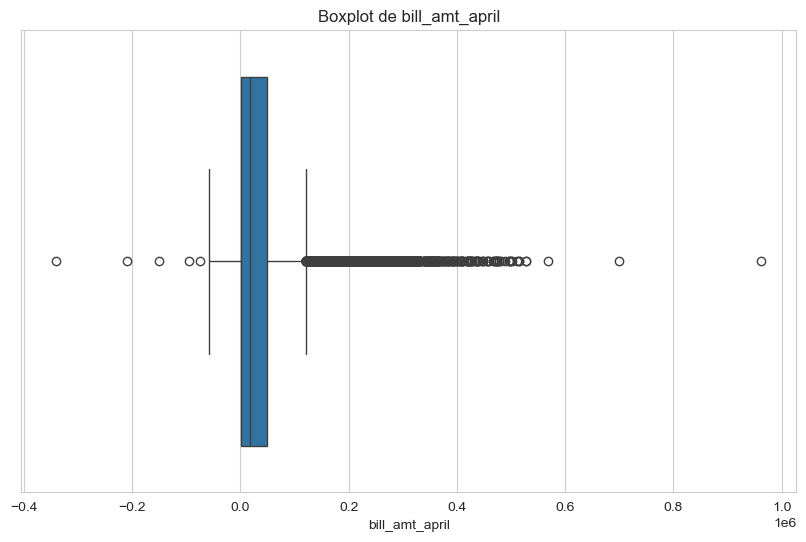

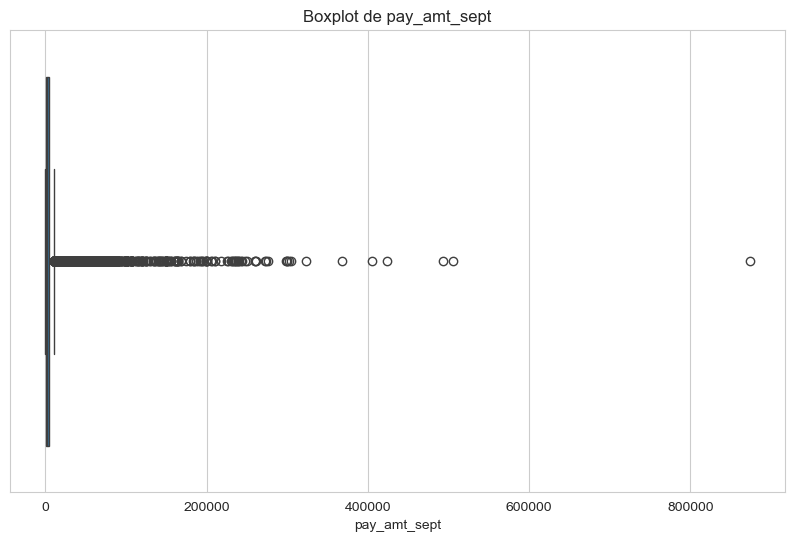

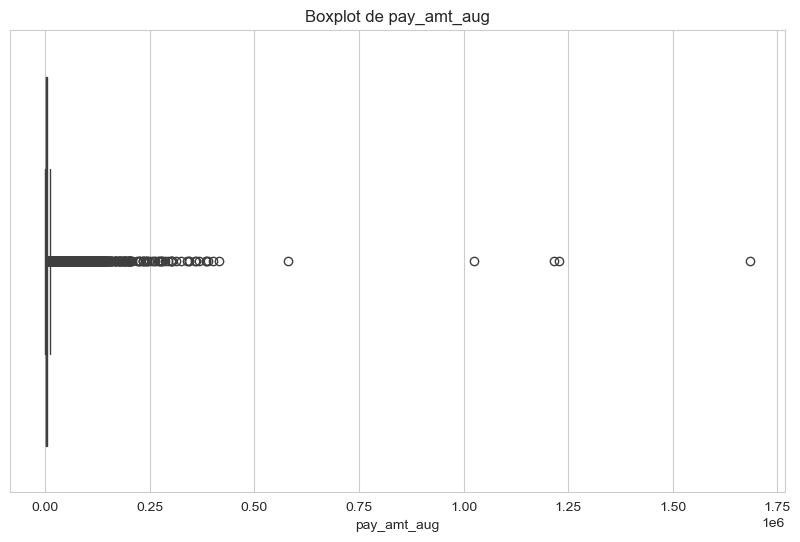

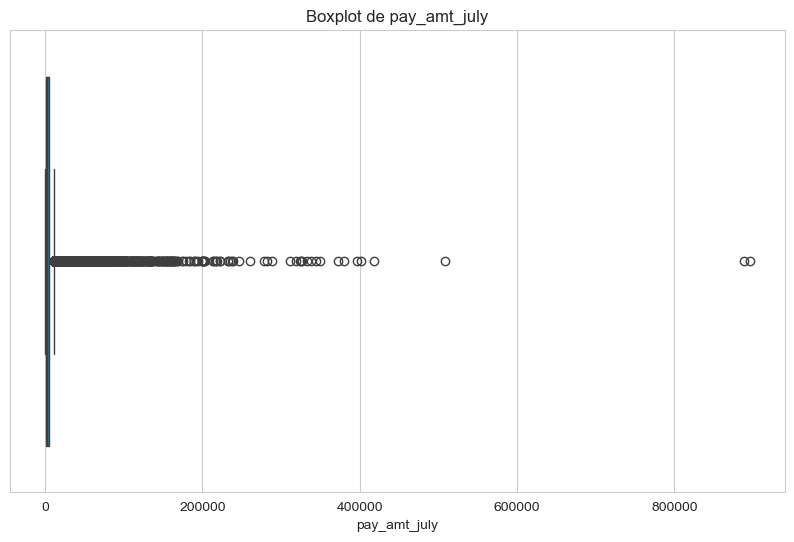

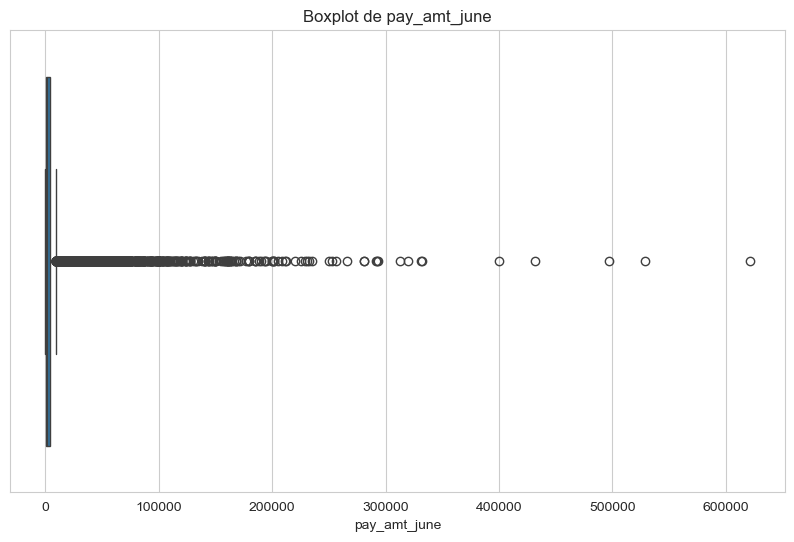

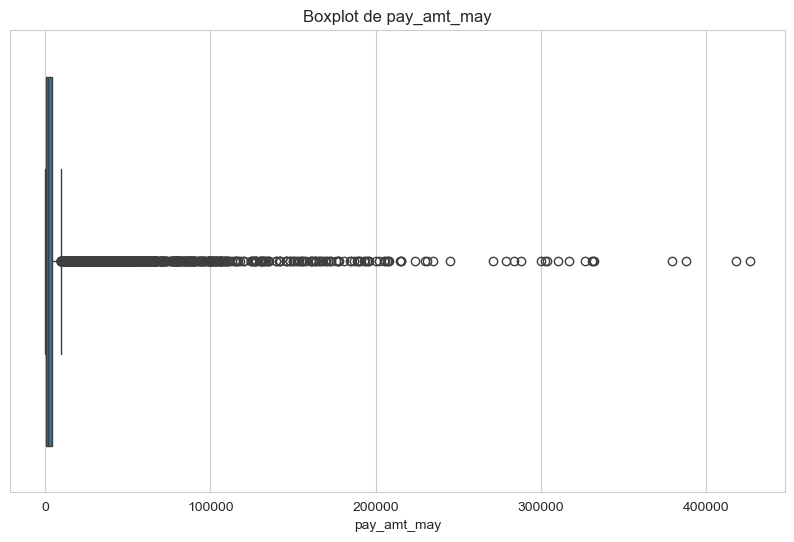

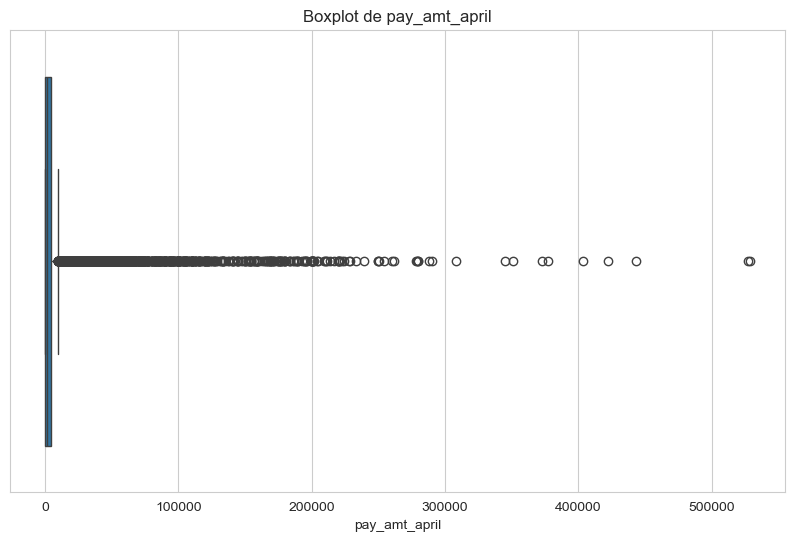

In [34]:
# — Detección de outliers —
import seaborn as sns

num_cols = ['limit_bal'] \
         + [c for c in df.columns if c.startswith('bill_amt_')] \
         + [c for c in df.columns if c.startswith('pay_amt_')]

# Confirmar cuantiles extremos
v_q = df[num_cols].quantile([0, 0.01, 0.25, 0.5, 0.75, 0.99, 1]).T
display(v_q)

# Boxplots uno a uno
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()


Facturación: ['bill_amt_sept', 'bill_amt_aug', 'bill_amt_july', 'bill_amt_june', 'bill_amt_may', 'bill_amt_april']
Pagos     : ['pay_amt_sept', 'pay_amt_aug', 'pay_amt_july', 'pay_amt_june', 'pay_amt_may', 'pay_amt_april']


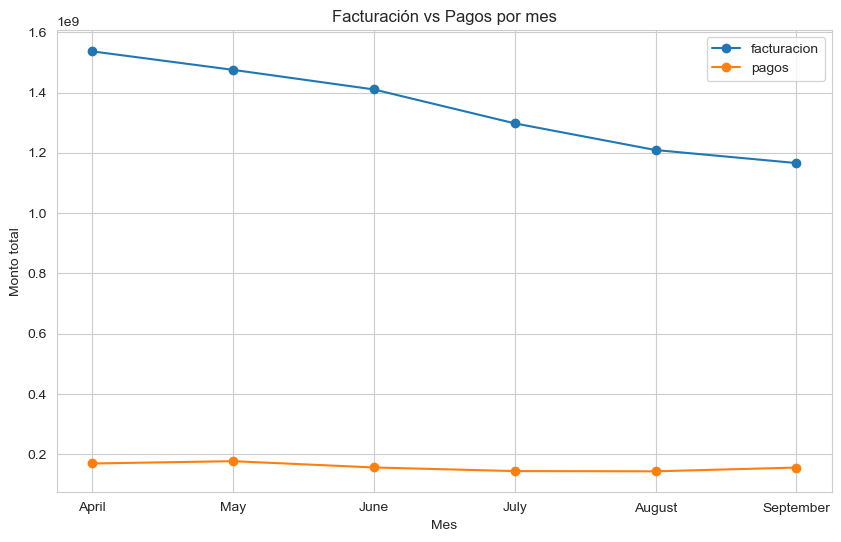

In [35]:
# — Análisis temporal agregado por mes —
bill_cols = [c for c in df.columns if c.startswith('bill_amt_')]
pay_cols  = [c for c in df.columns if c.startswith('pay_amt_')]

# Confirmación de columnas mensuales
print("Facturación:", bill_cols)
print("Pagos     :", pay_cols)

month_names = ['April','May','June','July','August','September']
df_ts = pd.DataFrame({
    'facturacion': df[bill_cols].sum().values,
    'pagos'      : df[pay_cols].sum().values
}, index=month_names)

df_ts.plot(marker='o', title='Facturación vs Pagos por mes')
plt.xlabel('Mes'); plt.ylabel('Monto total')
plt.show()


# Descubrimientos
Perfil Demográfico: El cliente típico es una mujer, soltera o casada , con educación de 
universidad o posgrado y una edad concentrada entre los 25 y 40 años.

Perfil Financiero: La mayoría de los clientes tienen límites de crédito relativamente bajos (menos de 200,000 NT$), aunque existe un grupo con límites muy altos.

Comportamiento de Pago (X6): Es muy revelador que la categoría más grande en el estado de pago de septiembre sea "No Doc. (pago mínimo)", superando incluso a los que pagaron puntualmente. Esto sugiere que una gran parte de la cartera está pagando lo mínimo para no entrar en mora, lo cual es una señal de riesgo en sí misma

Problema de Incumplimiento: Existe un desbalance de clases considerable. Aproximadamente un 
22% de los clientes (clase 1) incumplieron con su pago, frente a un 78% que no lo hizo (clase 0). Esto es un punto crítico para el modelado.

Correlaciones Clave: La matriz de correlación muestra que los montos de facturación (bill_amt) están fuertemente correlacionados entre sí mes a mes. Además, se confirma que un mayor límite de crédito (limit_bal) se asocia con una menor probabilidad de incumplimiento (correlación negativa).

In [ ]:
print("Valores originales en 'education':", sorted(df['education'].unique()))
print("Valores originales en 'marriage':", sorted(df['marriage'].unique()))

df_clean = df.copy()

df_clean['education'] = df_clean['education'].replace([0, 5, 6], 4)

df_clean['marriage'] = df_clean['marriage'].replace(0, 3)

label_cols = [col for col in df_clean.columns if '_label' in col]
df_clean = df_clean.drop(columns=label_cols)

print("\n--- DataFrame después de la limpieza ---")
print("Valores limpios en 'education':", sorted(df_clean['education'].unique()))
print("Valores limpios en 'marriage':", sorted(df_clean['marriage'].unique()))

Valores originales en 'education': [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]
Valores originales en 'marriage': [np.int64(0), np.int64(1), np.int64(2), np.int64(3)]

--- DataFrame después de la limpieza ---
Valores limpios en 'education': [np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
Valores limpios en 'marriage': [np.int64(1), np.int64(2), np.int64(3)]


: 

: 

: 

In [ ]:
try:
    project_root = Path.cwd().parent
    processed_data_path = project_root / "data" / "processed"
    
    processed_data_path.mkdir(parents=True, exist_ok=True)
    
    file_path = processed_data_path / "credit_card_clients_clean.csv"
    df_clean.to_csv(file_path, index=False)
    
    print(f"\ DataFrame limpio guardado exitosamente en: {file_path}")

except Exception as e:
    print(f"\ Ocurrió un error al guardar el archivo: {e}")

\ DataFrame limpio guardado exitosamente en: /Users/edusant/Desktop/personal/blue_tab/proyecto-riesgo-crediticio/data/processed/credit_card_clients_clean.csv


: 

: 

: 

Claro, aquí tienes un texto conciso y profesional que resume los hallazgos clave del análisis exploratorio, ideal para la conclusión de tu notebook.

***

### Conclusiones del Análisis Exploratorio de Datos (EDA)

El análisis exploratorio de los datos de clientes de tarjetas de crédito ha revelado varios patrones y características fundamentales que serán cruciales para la futura construcción de un modelo de riesgo de incumplimiento.

1.  **Perfil del Cliente:** El perfil demográfico predominante corresponde a mujeres jóvenes (25-40 años), solteras o casadas, con un nivel educativo universitario o de posgrado. En el aspecto financiero, la mayoría de la cartera se concentra en límites de crédito por debajo de los 200,000 NT$, aunque existe un subgrupo con límites significativamente más elevados.

2.  **Comportamiento de Pago y Riesgo Inherente:** Un hallazgo conductual de gran relevancia es que la modalidad de pago más común no es el pago puntual, sino el pago del monto mínimo requerido. Esto indica que una porción considerable de los clientes mantiene saldos deudores de forma recurrente, lo cual constituye un factor de riesgo intrínseco.

3.  **Factores Asociados al Incumplimiento:**
    * **Desbalance de Clases:** Se confirma un desbalance significativo en la variable objetivo, con una tasa de incumplimiento de aproximadamente el **22%**. Este factor deberá ser gestionado metodológicamente durante el entrenamiento del modelo para evitar sesgos.
    * **Relaciones Demográficas:** Se observa que los hombres presentan una tasa de impago ligeramente superior a las mujeres. Los clientes con nivel educativo de secundaria y universidad muestran las tasas de incumplimiento más altas.

4.  **Implicaciones para el Modelado:** El análisis subraya la necesidad de un preprocesamiento cuidadoso antes de la fase de modelado. Será indispensable aplicar técnicas para manejar el **desbalance de clases**, tratar la **multicolinealidad** entre las variables de facturación y gestionar los **valores atípicos** identificados en las variables financieras para asegurar la robustez y fiabilidad del modelo predictivo.